In [1504]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib.dates as mdates

from pandas import Series, DataFrame

In [1505]:
vusa_history = pd.read_csv("../data/vusa_data.csv")
vusa_history.set_index('Date', inplace=True)

In [1506]:
vusa_history.describe()

,Open,High,Low,Close,Adj Close,Volume
count,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,38.407195,39.050965,37.825653,38.463700,38.463700,1.192877e+06
std,15.384204,15.725028,15.090820,15.385247,15.385247,8.238180e+05
min,15.772000,16.110001,15.770000,15.920000,15.920000,2.726000e+03
25%,25.134999,25.527499,24.682501,25.175000,25.175000,7.315558e+05
50%,36.885001,37.320002,36.385000,37.055000,37.055000,1.041942e+06
75%,49.450001,50.491877,48.653124,49.210625,49.210625,1.465209e+06
max,67.794998,74.550003,66.915001,67.959999,67.959999,7.631748e+06


In [1507]:
vusa_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 2012-05-21 to 2023-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       580 non-null    float64
 1   High       580 non-null    float64
 2   Low        580 non-null    float64
 3   Close      580 non-null    float64
 4   Adj Close  580 non-null    float64
 5   Volume     580 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.7+ KB


In [1508]:
vusa_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-21,15.772000,16.110001,15.770000,16.059999,16.059999,5849
2012-05-28,16.059999,16.209999,15.980000,15.920000,15.920000,11314
2012-06-04,15.920000,16.200001,15.920000,16.219999,16.219999,15083
2012-06-11,16.209999,16.389999,16.059999,16.240000,16.240000,2726
2012-06-18,16.280001,16.440001,16.190001,16.250000,16.250000,38822


In [1509]:
vusa_history.index = pd.to_datetime(vusa_history.index)


In [1510]:
# Analysis of VUSA stock value over varying periods and intervals of time.

monthly_vusa_data = vusa_history.resample('M').mean()

max_monthly_dates = monthly_vusa_data.index
max_monthly_close = monthly_vusa_data['Close']

prev_year_dates = vusa_history[-52:].index
prev_year_close = vusa_history[-52:]['Close']

prev_five_years_dates = max_monthly_dates[-60:]
prev_five_years_close = max_monthly_close[-60:]

def plot_stock_value(X, Y, date_locator=mdates.YearLocator(2), date_format=mdates.DateFormatter('%Y')):
    fig, ax = plt.subplots()

    ax.plot(X, Y, color='#00e68a')
    ax.set_ylabel("Closing Value (£)", color='lightgrey')
    ax.set_xlabel("Date", color='lightgrey')
    ax.set_title("Stock Value Over Time (Monthly)", color='lightgrey')
    ax.set_ylim(top=Y.max() * 1.05, bottom=Y.min() * 0.95)

    ax.yaxis.grid(True, linewidth=0.2, color='white')
    ax.xaxis.grid(False)
    
    fig.set_facecolor('#333333')
    ax.tick_params(axis='both', colors='lightgrey')
    ax.set_facecolor('#333333')
    ax.fill_between(X, Y, color='steelblue')

    ax.xaxis.set_major_locator(date_locator)
    ax.xaxis.set_major_formatter(date_format)

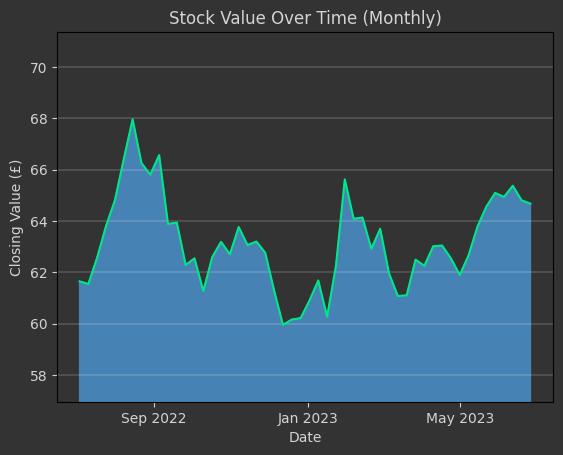

In [1511]:
plot_stock_value(prev_year_dates, prev_year_close, date_locator=mdates.MonthLocator(interval=4), date_format=mdates.DateFormatter('%b %Y'))

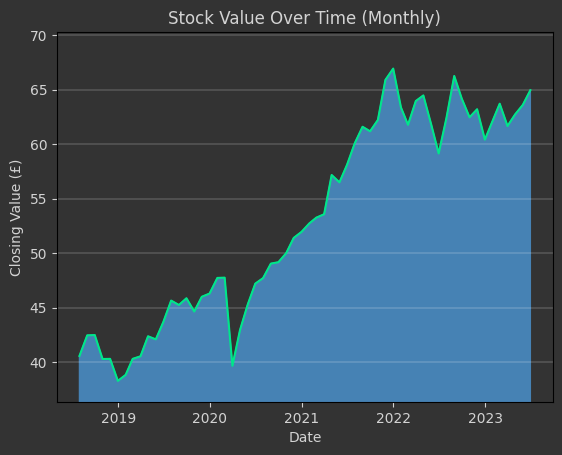

In [1512]:
plot_stock_value(prev_five_years_dates, prev_five_years_close, date_locator=mdates.YearLocator(1))

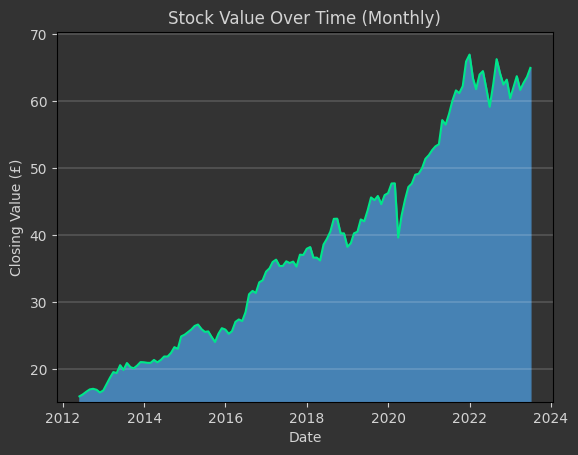

In [1513]:
plot_stock_value(max_monthly_dates, max_monthly_close, date_locator=mdates.YearLocator(2))

In [1514]:
monthly_return_rate = (((max_monthly_close[-1] - max_monthly_close[0]) / max_monthly_close[0]) * 100) / len(max_monthly_close)

yearly_vusa_data = vusa_history.resample('Y').mean()
max_yearly_close = yearly_vusa_data['Close']

yearly_return_rate = (((max_yearly_close[-1] - max_yearly_close[0]) / max_yearly_close[0]) * 100) / len(max_yearly_close)

print(yearly_return_rate)


monthly_return_rate

23.077298670214734


2.284747768231124